                                                        Locally Linear Embedding in Machine Learning                                        
    

# Locally Linear Embedding in Machine Learning


Locally Linear Embedding (LLE) is a non-linear dimensionality reduction technique used in machine learning to uncover meaningful structures in high-dimensional data. Unlike linear methods such as PCA, LLE preserves the local relationships among data points making it effective for visualizing and analyzing complex datasets without losing the important shape or structure of the data.

Locally Linear Embedding (LLE) is a non-linear dimensionality reduction technique used in machine learning to uncover meaningful structures in high-dimensional data. Unlike linear methods such as PCA, LLE preserves the local relationships among data points making it effective for visualizing and analyzing complex datasets without losing the important shape or structure of the data.

## Importance in Dimensionality Reduction

LLE is important in dimensionality reduction because:

* **Preserves Local Structures:** Maintains relationships between neighbouring points.
* **Captures Non Linear Patterns:** Models complex manifolds beyond linear methods.
* **Reduces Dimensionality:** Simplifies high-dimensional data for analysis.
* **Improves Visualization:** Projects data into 2D or 3D for exploration.
* **Reveals Hidden Structures:** Uncovers latent patterns not visible in the original space.
* **Enhances Feature Extraction:** Identifies intrinsic features for downstream tasks.
* **Facilitates Similarity Analysis:** Preserves neighbourhoods for clustering or similarity measures.
* **Supports Noise Reduction:** Filters out irrelevant variations in data.

**Consider a Swiss roll dataset a 3D shape that looks like a rolled up sheet. Even though it’s curved and complex LLE can “unroll” it into a flat 2D shape while keeping the original structure and relationships between points.**

## Working

The LLE algorithm can be broken down into several steps:

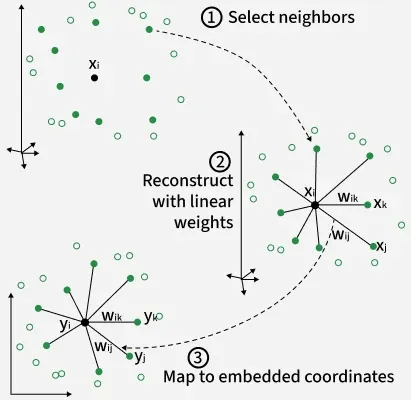

1. Neighborhood Selection:

* For each data point in the high dimensional space, it identifies its k-nearest neighbors.
* This step is crucial because it assumes each point can be approximated by a linear combination of its neighbors capturing local structure.

2. Weight Matrix Construction:

* It computes weights for each point to represent it as a linear combination of its neighbors.
* The weights are chosen to minimize reconstruction error often using linear regression.
* All weights together form a weight matrix that encodes local relationships in the dataset.

3. Global Structure Preservation:

* Using the weight matrix, It finds a lower dimensional embedding that best preserves these * local linear relationships.
* This is done by minimizing a cost function that measures how well each point can be reconstructed from its neighbors in the reduced space.

4. Output Embedding:

* The result is a low dimensional representation of the data that captures the essential structure while preserving neighborhood relationships.
* This embedding can be used for visualization, clustering or further analysis.

## Mathematical Implementation of LLE Algorithm

1. **Neighborhood Selection:**
   For each data point \( x_i \) in the high-dimensional space, identify its k-nearest neighbors. This can be done using distance metrics like Euclidean distance.

2. **Weight Matrix Construction:**
   For each data point \( x_i \), compute weights \( w_{ij} \) that minimize the reconstruction error:
   \[\min_{w_{ij}} \sum_{i} \left\| x_i - \sum_{j} w_{ij} x_j \right\|^2\]
   subject to the constraint that the weights sum to 1:
   \[\sum_{j} w_{ij} = 1\]

3. **Global Structure Preservation:**
   Find a lower-dimensional embedding \( y_i \) that minimizes the cost function:
   \[\min_{y_i} \sum_{i} \left\| y_i - \sum_{j} w_{ij} y_j \right\|^2\] 

    This can be solved using eigenvalue decomposition of the matrix derived from the weight matrix.

4. **Output Embedding:**
   The resulting low-dimensional embedding \( Y \) is obtained from the eigenvectors corresponding to the smallest non-zero eigenvalues, which captures the essential structure of the data while preserving local relationships.

## Parameters in LLE Algorithm

LLE has a few parameters that influence its behavior:

* **1. n_neighbors:** Number of nearest neighbors to use for reconstructing each data point. A critical parameter that affects the quality of the embedding.

* **2. n_components:** The target number of dimensions for the reduced space like 2 or 3 for visualization.

* **3. reg (Regularization):** Small regularization term added to the weights to handle cases of bad conditioned matrices improving numerical stability.

* **4. eigen_solver:** Algorithm used to solve the eigenvalue problem. Choice depends on dataset size and efficiency needs.

* **5. method:** Specifies the LLE variant:

  * **standard:** Basic LLE.
  * **modified:** Improves robustness to noise.
  * **hessian:** Hessian Eigenmaps captures curvature.
  * **ltsa:** Local Tangent Space Alignment which are better for manifolds.

* **6. max_iter and tol:** Maximum iterations and tolerance for convergence in the eigenvalue solver.

* **7. random_state:** Controls randomness in certain solvers for reproducibility.




## Implementation

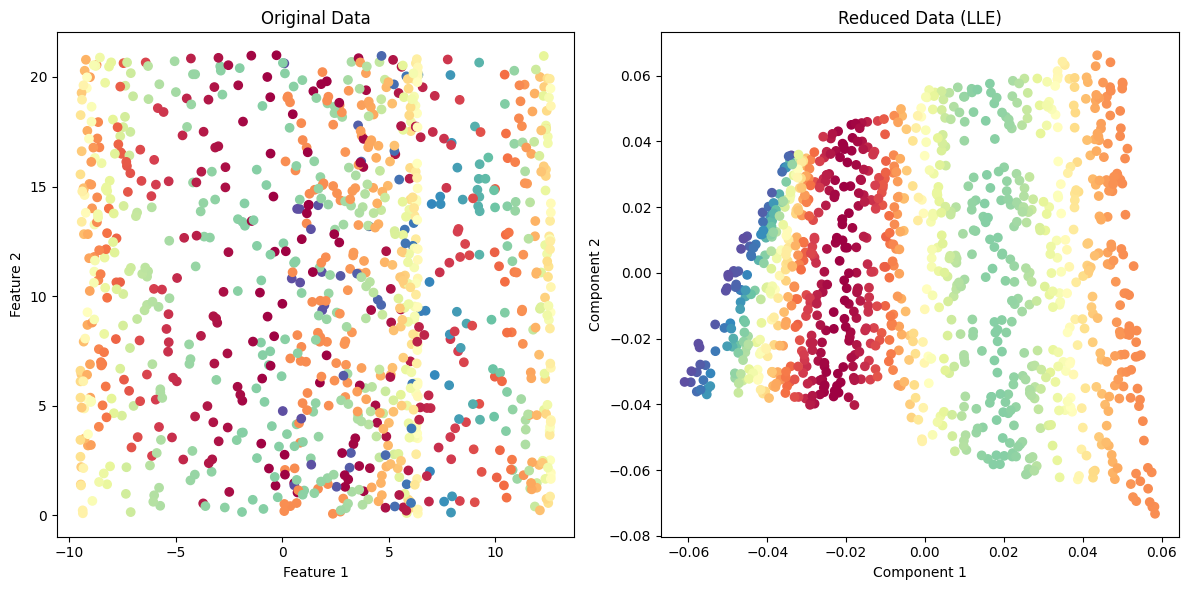

In [1]:
# import Liberaries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding

#  Generate a Synthetic Dataset (Swiss Roll)

n_samples = 1000
n_neighbors = 10
X, _ = make_swiss_roll(n_samples=n_samples)

# Apply Locally Linear Embedding (LLE)

lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2)
X_reduced = lle.fit_transform(X)

# Visualize the Original and Reduced Data

plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=X[:, 2], cmap=plt.cm.Spectral)
plt.title("Original Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(122)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=X[:, 2], cmap=plt.cm.Spectral)
plt.title("Reduced Data (LLE)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

plt.tight_layout()
plt.show()

## Applications

Here are some of the applications of LLE:

* **Image Processing:** Used in face recognition, handwriting analysis and other image related tasks by capturing non linear patterns and reducing dimensions for easier processing.
* **Speech and Audio Analysis:** Helps in modeling complex patterns in speech or audio signals preserving local structures for feature extraction and classification.
* **Data Visualization:** Projects high dimensional data into 2D or 3D for exploration and pattern recognition making it easier to identify clusters or structures.
* **Manifold Learning in Biology:** Used to study gene expression or biological data where samples lie on a non linear manifold preserving neighborhood relationships.
* **Anomaly Detection:** Assists in identifying unusual patterns or clusters in datasets by reducing dimensions while maintaining local relationships.

## **Advantages**
Some of the advantages of LLE are:

* **Preservation of Local Structures:** Maintains the local neighborhood relationships in the data preserving distances between nearby points and capturing the natural shape of the dataset.
* **Handling Non Linearity:** Unlike PCA which only captures linear patterns, LLE can model complex non-linear structures making it effective for datasets lying on curved manifolds.
* **Dimensionality Reduction:** Reduces high dimensional data into fewer dimensions while keeping important properties intact making it easier to visualize and analyze.
* **Good for Visualization:** Projects data into 2D or 3D spaces without losing much structure, useful for exploring high dimensional datasets.
* **Unsupervised Learning:** Does not require labels so it works well for exploratory data analysis in various domains like images, speech or genetics.

## **Disadvantages**

Some of the disadvantages of LLE are:

* **Sensitive to Parameters:** The choice of the number of neighbors (k) is crucial, a poor selection can distort the embedding and reduce accuracy.
* **No Out-of-Sample Mapping:** It doesn't provide a direct transformation for new, unseen data, the algorithm must be re-run for additional samples.
* **Sensitive to Noise and Outliers:** Unusual or noisy data points can distort local neighborhoods leading to poor embeddings.
* **Loss of Global Structure:** Focuses on preserving local relationships but may ignore global data patterns and distances.
* **Curse of Dimensionality:** In very high dimensional spaces, more neighbors are needed to capture local structures which increases computational costs.

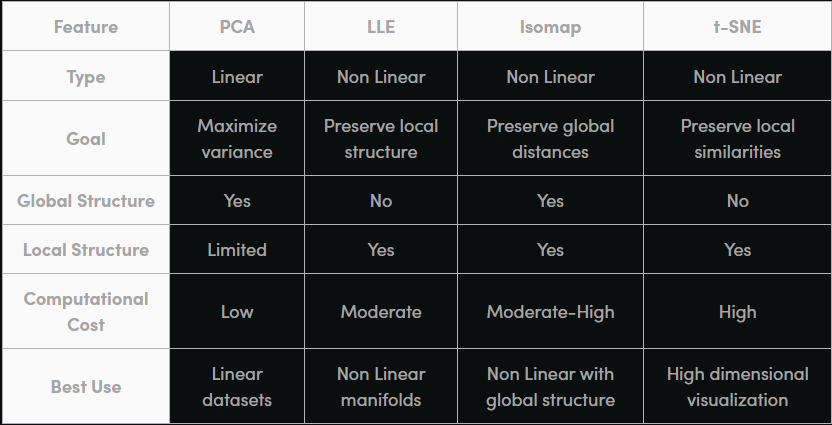

## Comparison of Manifold Learning methods in Scikit Learn


Manifold learning is a dimensionality reduction techniques which turns complex, high-dimensional data into simpler form while keeping important patterns and features. It works well when the data has curved or non-linear shapes that simple methods like PCA can’t handle. It has several features like:

* Finds and keeps non-linear patterns.
* Makes data easier to see and work with.
* Removes noise and keeps useful info.
* Helps models work better and faster.

## Manifold Learning Methods
Scikit-learn provides several manifold learning algorithms. We will use digits dataset from Scikit-learn which has images of numbers from 0 to 9. Each image is 8×8 pixels giving 64 values leading to many features in data. It consists of various steps:

* Importing required libraries and loading digit images dataset.
* Choosing a manifold learning algorithm.
* Fit the algorithm to the dataset.
* Convert the dataset to a lower-dimensional space.
* Visualizing the converted data.

# 1. t-SNE (t-distributed Stochastic Neighbor Embedding)

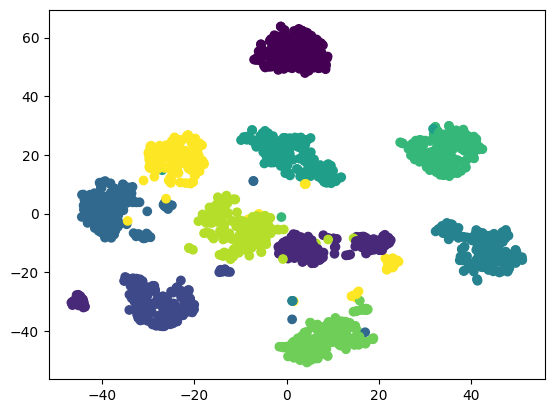

In [2]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data
y = digits.target

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
plt.show()

* Points within the same color share similar characteristics.
* Points from different clusters are more distinct from each other.
* Helps to understand the underlying structure of the data.
* Provides a simplified, lower-dimensional view of the data.

# 2. Isomap (Isometric Mapping)

* Isomap preserves geodesic distances i.e the shortest paths along the manifold.
* This ensures the overall structure of the data is maintained when mapped into two dimensions.
* It captures the broader relationships within the data.
* Provides a global view of how the data points relate to each other.

C:\Users\PANDIT JI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\PANDIT JI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\sparse\_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])


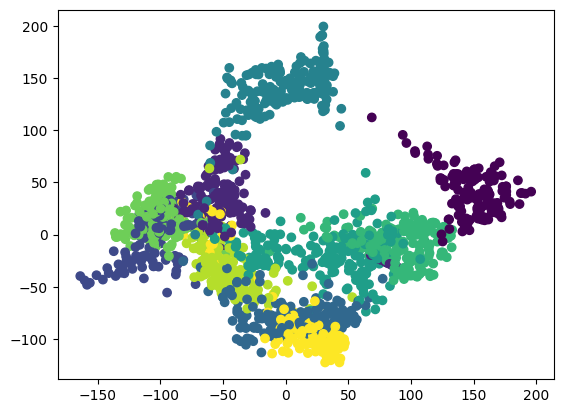

In [3]:
from sklearn.datasets import load_digits
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data
y = digits.target

isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X)

plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y)
plt.show()

# 3. LLE (Locally Linear Embedding)

* LLE focuses on preserving the local structure of the data.
* Points within the same color are close to each other in high-dimensional space and this proximity is maintained in the 2D projection.
* Data points appear arranged in linear, elongated shapes indicating the intrinsic dimensionality of the data might be lower than expected.
* Tight clusters with different orientations suggest that data points within each cluster are similar to each other.
* The global structure may be somewhat distorted in the 2D projection.

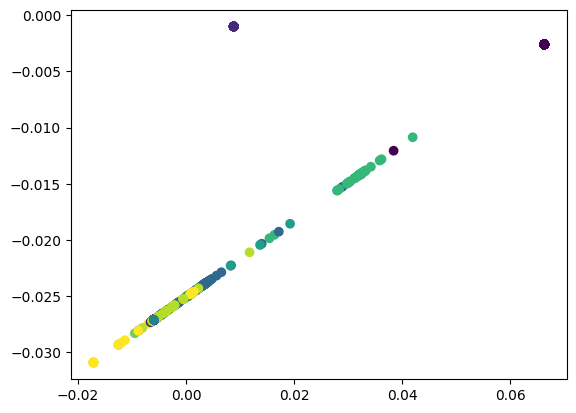

In [4]:
from sklearn.datasets import load_digits
from sklearn.manifold import LocallyLinearEmbedding
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data
y = digits.target

lle = LocallyLinearEmbedding(n_components=2, random_state=42)
X_lle = lle.fit_transform(X)

plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y)
plt.show()

# 4. MDS (Multi-Dimensional Scaling)

Multi-Dimensional Scaling (MDS) is a dimensionality reduction method that attempts to preserve pairwise distances between points while projecting them into a lower-dimensional space. It is particularly useful when you want to retain the pairwise relationships between data points.

* Unlike others it emphasizes the overall distances between points rather than local or geodesic relationships.
* Focuses on maintaining global relationships between data points.
* Aims to preserve the distances between points as much as possible in the 2D space.

In [ ]:
from sklearn.datasets import load_digits
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data
y = digits.target

mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X)

plt.scatter(X_mds[:, 0], X_mds[:, 1], c=y)
plt.show()

C:\Users\PANDIT JI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


# Comparison of Methods

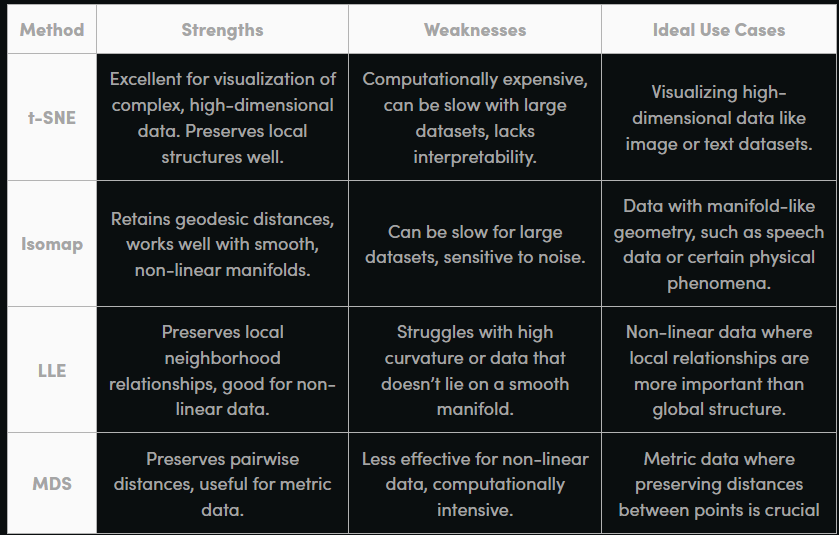